In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model


Using TensorFlow backend.


In [2]:
W = 300
H = 200

Label = ['Bus', 'Cargo truck', 'Motorcycle', 'Pickup truck', 'Sedan', 'Suv']
Label2 = ['Sedan', 'Suv']


Found 1 images belonging to 1 classes.


In [3]:
model = load_model('model')
model.load_weights('model_weight.h5')

model2 = load_model('model2')
model2.load_weights('model2_weight.h5')

Found 1 images belonging to 1 classes.
 
 
 
-------- Predict -------
OUTPUT :  [0.000 0.000 0.000 0.006 0.007 0.993]
예측 결과 :  Suv


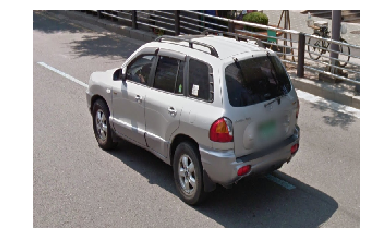

In [11]:
###########################################
# 모델 테스트
test_datagen = ImageDataGenerator(rescale=1./255)
test_path = 'testset'
test_batches = test_datagen.flow_from_directory(test_path, target_size=(H,W),
                                                batch_size=1, class_mode='categorical', shuffle=False)
print(" ")
print(" ")
print(" ")
print("-------- Predict -------")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
imgs, labels = next(test_batches)
imgs2 = imgs*255

output = model.predict(imgs)
pd_ans = np.argmax(output[0])
pd_ans = Label[pd_ans]

counter = 0

if (pd_ans == 'Sedan') | (pd_ans == 'Suv'):
    output2 = model2.predict(imgs)
    pd_ans2 = np.argmax(output2[0])
    pd_ans = Label2[pd_ans2]
    output[0][4]=output2[0][0]
    output[0][5]=output2[0][1]    
    counter += 1
    
# 단일 이미지 출력
p = [0]
for j in p:
    ims = imgs2[j]
    lb = labels[j]
    pd = output[j]

    ims = np.array(ims).astype(np.uint8)
    plt.imshow(ims)
    plt.axis('off')

    lb_ans = np.argmax(lb)
    lb_ans = Label[lb_ans]

    print('OUTPUT : ', pd)
    print('예측 결과 : ', pd_ans)
